Il est important d'avoir des bonnes pratiques pour organiser vos fichier.

La mienne qui n'est pas une règle absolue est de toujours créer au moins trois parties :
# Import des librairies
Où j'importe d'un coup toutes les librairies que je vais utiliser
# Création des fonctions perso
Pour mes besoin d'analyses et de traitement (peut être vu dans une leçon ultérieure)
# Import des données
Où j'importe toutes les données que je vais utiliser

La suite dépend de l'objectif, "analyse des données", "comparaisons", "tests divers"

Je précise aussi la source des mes travaux (lorsque que c'est sur des données issues du net)

Source : https://www.kaggle.com/c/titanic

# Import des librairies

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Création des fonctions perso
Dans le cadre du jeux de données du titanic il y a dans les nom des titres.

Plus tard dans ce fichier pour utliser ces titres il va falloir les traduires;

je vous propose ici une traduction. Vous pourrez aller plus loin ou la modifier à l'envie.

In [2]:
dict_titre = {
    'Capt': 'Dr/Clergé/Mil',
    'Col': 'Dr/Clergé/Mil',
    'Major': 'Dr/Clergé/Mil',
    'Jonkheer': 'Honorifique',
    'Don': 'Honorifique',
    'Dona': 'Honorifique',
    'Sir': 'Honorifique',
    'Dr': 'Dr/Clergé/Mil',
    'Rev': 'Dr/Clergé/Mil',
    'the Countess': 'Honorifique',
    'Mme': 'Mrs',
    'Mlle': 'Miss',
    'Ms': 'Mrs',
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Miss',
    'Master': 'Master',
    'Lady': 'Honorifique'
}

La fonction ci dessous est un exemple.

Elle sera utilisée plus loin pour faire des graphiques.

In [3]:
# Selecting categorical data for univariate analysis
cats = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']


def plotFrequency(cats):
    #"A plot for visualize categorical data, showing both absolute and relative frequencies"
    fig, axes = plt.subplots(math.ceil(len(cats) / 3), 3, figsize=(20, 12))
    axes = axes.flatten()

    for ax, cat in zip(axes, cats):
        total = float(len(df_train[cat]))
        sns.countplot(df_train[cat], palette='plasma', ax=ax)

        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2.,
                    height + 10,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha="center")

        plt.ylabel('Count', fontsize=15, weight='bold')

# Import des données
Pour l'instant on ne va travailler que sur les données d'entraînement

In [4]:
df_train = pd.read_csv("data/train.csv")

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.shape

(891, 12)

# Recherche des valeurs manquantes
Un des problèmes courants est les valeurs manquantes.

Pour plusieurs raisons, anciennes données incomplète, bugs d'écriture, données inutilisable.

Ainsi l'une des première choses à faire est de vérifier où se trouve les données manquantes.
## Les foncitons pour cette vérification
Il y a deux foncitons utilisées dans ce cas :
* .sum() : qui renvoie la somme des valeurs (ici une colonne)
* .isna() : qui renvoie TRUE si la cellule est vide et FALSE si elle est pleine.
Note : python interprète TRUE comme valant 1 et FALSE comme valant 0.

Donc si on combine les deux on aura la quantité de valeurs manquantes.

Ce qui peut être fait c'est de demander d'abord si toutes les cellules sont vide ou pleines puis de faire la somme. Pour ce faire on applique les deux fonctions directement au DataFrame

Double cliquez pour la solution
<!-- df_train.isna().sum() -->

In [30]:
#Votre test pour obtenir les valeurs manquantes par colonne











# Description des colonnes
Une autre fonction très utile pour commencer les permières recherches dans un DataFrame est la fonction :
* .describe() qui par défaut permet de décrire les données numérique du DataFrame.

Si on l'utilise avec le paramètre include="all" on aura aussi la description pour les autres types de données

Essayez donc les deux choix pour la fonction.

Double cliquez pour la solution

<!--
df_train.describe(include='all')
df_train.describe() 
-->

Une autre solution pour décrire le DataFrame est de regarder une à une toutes les colonnes et d'utiliser la fonction :
* .value_counts() : qui renvoie un tableau croisé dynamique de la colonne classé par ordre décroissant par défaut

Pour ce faire l'une des solution est le code ci-dessous qui est explicite.

In [9]:
for name in df_train.columns:
    print(20*"-")
    print(name)
    print(df_train[name].value_counts())

--------------------
PassengerId
891    1
293    1
304    1
303    1
302    1
301    1
300    1
299    1
298    1
297    1
296    1
295    1
294    1
292    1
306    1
291    1
290    1
289    1
288    1
287    1
286    1
285    1
284    1
283    1
282    1
281    1
305    1
307    1
279    1
321    1
      ..
561    1
560    1
584    1
585    1
586    1
587    1
610    1
609    1
608    1
607    1
606    1
605    1
604    1
603    1
602    1
601    1
600    1
599    1
598    1
597    1
596    1
595    1
594    1
593    1
592    1
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64
--------------------
Survived
0    549
1    342
Name: Survived, dtype: int64
--------------------
Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64
--------------------
Name
Sage, Miss. Dorothy Edith "Dolly"                          1
Williams-Lambert, Mr. Fletcher Fellows                     1
Webber, Mr. James                                          1
Hart,

J'avoue c'est assez imbuvalbe, mais très utile sur moins de colonnes, où moins de catégories.

On peu vouloir regarder les colonnes via des filtres (rappels de la session 2).

Par exemple je vois dans les tableau d'au dessus que la cabine G6 est occupée par 4 personnes, je peux donc faire un filtre pour voir qui l'occupe.

Double cliquez pour la solution

<!--
df_train.loc[df_train["Cabin"] == "G6"] 
-->

In [ ]:
# Votre test pour voir qui occupe la cabine G6









Ce qui est pratique quand on cherche ce que d'autres font c'est que l'on se rend compte qu'il existe pleins de méthodes facile à mettre en oeuvre.

Notamment la fonction :
* .countplot() qui permet d'obtenir un histograme d'une des colonnes

Par exemple pour les "Survivants"

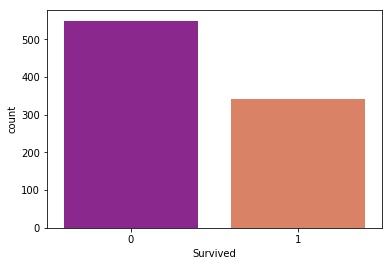

In [11]:
sns.countplot(df_train["Survived"], palette='plasma')

A votre tour !

Faite le graphique pour la colonne "Sex"

Double cliquez pour la solution

<!--
sns.countplot(df_train["Sex"], palette='plasma') 
-->

In [31]:
#Votre solution ici :





Il existe aussi beaucoup de fonctions/ressources accessible si on les recherche.

Par exmple la fonction créée au départ (source : https://www.kaggle.com/datafan07/titanic-eda-and-several-modelling-approaches) trace plusieurs graphiques d'un coup. Avec un peu d'expérience vous pourrez l'adapter à vos besoin. Où alors en créer une de toute pièce.

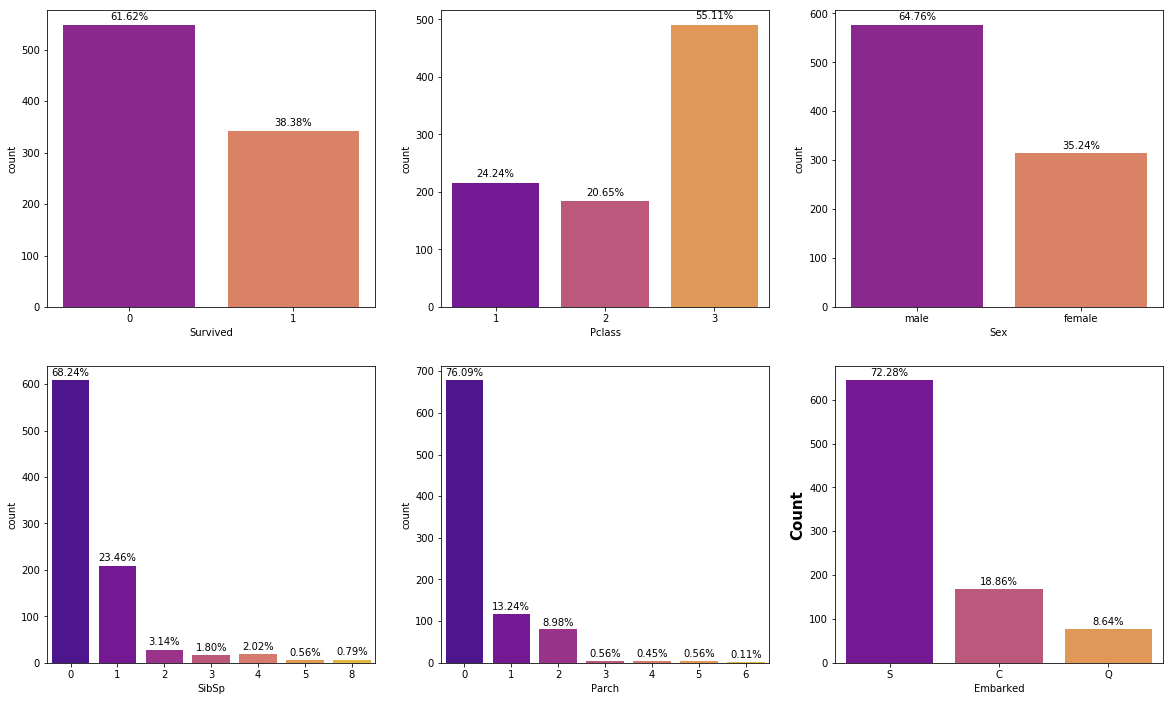

In [12]:
plotFrequency(cats)

Maintenant qu'on a pris en main le jeu de données.

Que l'on sait la quantité de valeurs manquantes et leur répartition. On va pouvoir tenter de faire un peu de machine learning dessus.

# Regard sur le pourcentage de survivants

A ce stade l'une des questions qui doit naturellement ce poser est : "est-ce que mon jeu de données est équilibré ?".

Dans le sens où mes différentes valeurs que j'essaie de prédire sont réparties équitablement ou presque.

Il n'est pas obligatoire d'avoir un jeu de données équilibré, mais connaître ça répartition évite des problèmes.

ATTENTION : On se trouve dans un cas où on veux prédire des catégories, deux catégories pour être exact (Survit/Ne survit pas), donc certaines méthodes et logiques s'appliquent. Dans le cas de données continues (le prix d'une maison, la consomation d'essence, ...) ce n'est pas la même logique.

Votre tour : a partir de ce qui vous as été présenté, essayer d'obtenir la repartition des Survivant dans le jeu de données.

Double cliquez pour la solution
<!--
df_train["Survived"].value_counts() 
-->

In [33]:
# Votre essai ici :






A ce stade nous avons toujours toutes les colonnes du jeu d'entrainement donc des colonnes au format texte inutilasble en l'état.

Il existe une fonction bien pratique pour transformer en 0 et 1 des variables à catégories :
* .get_dummies() : qui crée autant de colonne que de catégorie et remplis automatiquement avec 0 ou 1.

Exemple :

In [14]:
df_train = df_train.join(pd.get_dummies(df_train["Sex"]))
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0


Ici j'ai à la fois fait ma transformation de mes colonnes, puis je les ai rajoutées dans mon DataFrame.

Je peux aussi préciser un suffixe au besoin : 

In [15]:
df_train = df_train.join(pd.get_dummies(df_train["Embarked"], prefix = "emb"))
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,emb_C,emb_Q,emb_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,1,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,1,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0,1,0,0


Maintenant que nous avons comment extraire de l'information à partir de données simples.

on va le faire avec les titres présents dans les nom des personnes.
# Transformation des titres
Pour ce faire, on va :
* Créer une nouvelle colonne qui acceuillera nos titres
* lire ligne à ligne les noms des personnes
* lire titre à tire présent dans notre dictionnaire
* regarder si le titre est présent dans le nom
* Ajouter le nom dans la nouvelle colonne

In [16]:
df_train["titre"] = ""
for row in range(df_train.shape[0]):
    name = df_train.loc[row]["Name"]
    for titre in dict_titre:
        if titre in name:
            df_train["titre"][row] = dict_titre[titre]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Ensuite on peut regarder la repartition des titres

In [17]:
 df_train["titre"].value_counts()

Mr               518
Miss             183
Mrs              128
Master            40
Dr/Clergé/Mil     18
Honorifique        4
Name: titre, dtype: int64

Maintenant comme plus haut on va transformer cette colonne en autant de colonnes avec des valeurs 0-1.

En pensant bien à remplir le préfix.

Essayez !

Double cliquez pour la solution

<!-- 
df_train = df_train.join(pd.get_dummies(df_train["titre"], prefix = "titre"))
df_train.head()
-->

Maintenant qu'on a nettoyer/transformer nos valeurs, notre jeu de données est prêt pour la prédiction
# test de prédictions
Pour regard j'aime bien afficher les 5 premières lignes avec la fonction :
* .head() : qui renvoie les 5 première ligne du DataFrame

Pour avoir un visuel de mes données.

In [19]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,emb_C,emb_Q,emb_S,titre,titre_Dr/Clergé/Mil,titre_Honorifique,titre_Master,titre_Miss,titre_Mr,titre_Mrs
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,Mr,0,0,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,0,Mrs,0,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,Miss,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,Mrs,0,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,Mr,0,0,0,0,1,0


Je peux aussi rapidement isoler le nom des colonnes avec la fonction :
* .columns()

In [20]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'female', 'male',
       'emb_C', 'emb_Q', 'emb_S', 'titre', 'titre_Dr/Clergé/Mil',
       'titre_Honorifique', 'titre_Master', 'titre_Miss', 'titre_Mr',
       'titre_Mrs'],
      dtype='object')

Je vais maintenant simplement copier les données dans un nouveau DataFrame, en ne gardant que les données numériques.
Pour ce faire j'utilise la fonction :
* drop() : pour retirer les colonnes inutiles.

In [21]:
df_trainP = df_train.drop(["PassengerId", 
                           "Age",
                           "Name", 
                           "Sex", 
                           "Ticket", 
                           "Cabin", 
                           "Embarked",
                          "titre"], axis=1)

Je vérifie rapidement que j'ai bien la sortie que je veux

In [22]:
df_trainP.head()

,Survived,Pclass,SibSp,Parch,Fare,female,male,emb_C,emb_Q,emb_S,titre_Dr/Clergé/Mil,titre_Honorifique,titre_Master,titre_Miss,titre_Mr,titre_Mrs
0,0,3,1,0,7.2500,0,1,0,0,1,0,0,0,0,1,0
1,1,1,1,0,71.2833,1,0,1,0,0,0,0,0,0,0,1
2,1,3,0,0,7.9250,1,0,0,0,1,0,0,0,1,0,0
3,1,1,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,1
4,0,3,0,0,8.0500,0,1,0,0,1,0,0,0,0,1,0


A partir de là, d'ordinaire 4 fichiers sont créés:
* X_train : les données d'entraintement sans la colonne à prédire.
* X_test : les données de tests pour vérifier comment l'entrainement c'est passé.
* y_train : la colonne à prédire pour les données d'entraintement.
* y_test : la colonne à prédire pour les données de tests

Pour nous aider il existe une librairie avec une fonction tout faite pour ce genre de problème :
* train_test_split() : qui prend en entrée les deux DataFrame celui sans la colonne à prédire et uniquement la colonne à préidre, le ratio test/total, et le random_state.

ATTENTION : le random_state permet de fixer la répartition aléatoire et donc la répétabilité entre les tests. Il est bon de fixer cette valeur.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df_trainP.drop(["Survived"], axis=1), 
                                                    df_trainP["Survived"], 
                                                    test_size=0.2,
                                                    random_state=0)

A partir de maintenant j'ai toutes mes donneés bien rangées pour faire du Machine learning et tester plusieurs alogorythmes.

Les entrainements sont toujours découpés en 3 phases :
* Création de l'objet MODEL
* Entrainement sur les données
* Prédiction / Calcul de performances
## Le premier : le SVM (support vector machines) :

Ici on essaye de prédire la valeur en calculant des hyperplans limtes des catégories.

In [38]:
# Je crée mon MODEL l'objet qui sera entraîné
clf = svm.SVC(kernel='linear', C = 1.0)

# J'entraine avec la fonction .fit() en prenant mes valeurs d'entrainements
clf.fit(X_train, y_train)

# Je prédis avec mes valeurs de test
y_pred = clf.predict(X_test)

# Ensuite je peux faire une matrice de confusion
print(confusion_matrix(y_test, y_pred))

# Ou isoler la performance de mon MODEL
# ce que je demande ici c'est de regarder où mes données prédites sont les mêmes que mes données de test.
# Je vais obtenir une liste de TRUE / FALSE.
# Je somme pour obtenir la quantité de TRUE puis je divise par le nombre de points
print("Ma performance est de " + str(((y_pred == y_test).sum())/y_test.shape[0]))

[[93 17]
 [17 52]]
Ma performance est de 0.8100558659217877


## Le second : Nearest Neighbors où les plus proches voisins.

Ici on essaye de prédire la valuer en regardant la moyenne est K voisins les plus proches.

On peut donc modifier à l'envie le nombre de voisins.

In [43]:
# Je crée mon MODEL l'objet qui sera entraîné
# Par exemple avec 3 voisins
knn = KNeighborsClassifier(n_neighbors=3)

# J'entraine avec la fonction .fit() en prenant mes valeurs d'entrainements
knn.fit(X_train, y_train)

# Je prédis avec mes valeurs de test
y_test = knn.predict(X_test)

# Ensuite je peux faire une matrice de confusion
print(confusion_matrix(y_test, y_pred))

# Ou isoler la performance de mon MODEL
print("Ma performance est de " + str(((y_pred == y_test).sum())/y_test.shape[0]))

[[101  19]
 [  9  50]]
Ma performance est de 0.8435754189944135


A votre tour : tentez de faire un entraînement avec 4 proches voisins.

Double cliquez pour la réponse.

<!-- 

knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train, y_train)

y_test = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print("Ma performance est de " + str(((y_pred == y_test).sum())/y_test.shape[0]))

-->

In [ ]:
# Votre code ici :







Je peux aussi imaginer faire une boucle pour tester pleins de valeurs et les afficher après.

In [62]:
liste_score = {}
for voisin in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=voisin)
    knn.fit(X_train, y_train)
    y_test = knn.predict(X_test)
    liste_score[voisin] = ((y_pred == y_test).sum())/y_test.shape[0]

In [63]:
liste_score

{1: 0.8100558659217877,
 2: 0.7932960893854749,
 3: 0.8435754189944135,
 4: 0.7988826815642458,
 5: 0.7877094972067039,
 6: 0.776536312849162,
 7: 0.8268156424581006,
 8: 0.7877094972067039,
 9: 0.7821229050279329,
 10: 0.7932960893854749,
 11: 0.7932960893854749,
 12: 0.7877094972067039,
 13: 0.7877094972067039,
 14: 0.7932960893854749,
 15: 0.7988826815642458,
 16: 0.770949720670391,
 17: 0.7821229050279329,
 18: 0.776536312849162,
 19: 0.770949720670391,
 20: 0.7877094972067039,
 21: 0.7932960893854749,
 22: 0.776536312849162,
 23: 0.7988826815642458,
 24: 0.7877094972067039,
 25: 0.7988826815642458,
 26: 0.7932960893854749,
 27: 0.7988826815642458,
 28: 0.7932960893854749,
 29: 0.8044692737430168,
 30: 0.7877094972067039,
 31: 0.776536312849162,
 32: 0.776536312849162,
 33: 0.7653631284916201,
 34: 0.770949720670391,
 35: 0.776536312849162,
 36: 0.770949720670391,
 37: 0.770949720670391,
 38: 0.7430167597765364,
 39: 0.7597765363128491,
 40: 0.7541899441340782,
 41: 0.7486033519553

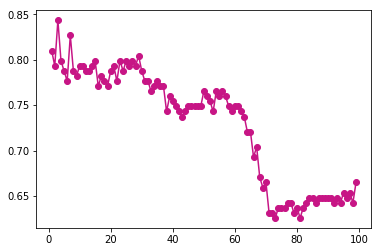

In [64]:
plt.plot(liste_score.keys(), liste_score.values(), marker='o', color='mediumvioletred')
plt.show()

## Le troisème : DecisionTree ou l'arbe de décision.

In [66]:
# Je crée mon MODEL l'objet qui sera entraîné
ForestTree = RandomForestClassifier(n_estimators=10)

# J'entraine avec la fonction .fit() en prenant mes valeurs d'entrainements
ForestTree.fit(X_train, y_train)

# Je prédis avec mes valeurs de test
y_test = ForestTree.predict(X_test)

# Ensuite je peux faire une matrice de confusion
print(confusion_matrix(y_test, y_pred))

# Ou isoler la performance de mon MODEL
print("Ma performance est de " + str(((y_pred == y_test).sum())/y_test.shape[0]))

[[100  12]
 [ 10  57]]
Ma performance est de 0.8770949720670391


Le paramètre n_estimators peut aussi être modifié :

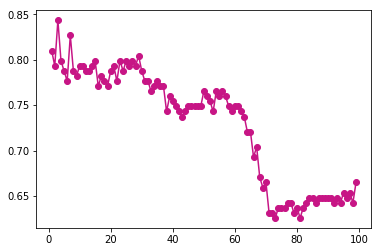

In [68]:
liste_score_forest = {}
for voisin in range(1,100):
    ForestTree = RandomForestClassifier(n_estimators=voisin)
    ForestTree.fit(X_train, y_train)
    y_test = knn.predict(X_test)
    liste_score_forest[voisin] = ((y_pred == y_test).sum())/y_test.shape[0]
plt.plot(liste_score.keys(), liste_score.values(), marker='o', color='mediumvioletred')
plt.show()